# Is there a bias in the way SNV errors are distributed?
---

This would suggest that error is *systematic* rather than random; or at least that it is not completely random.

In [1]:
import os
import sys
import configparser
import getopt
import numpy as np
import pandas as pd
from collections import Counter

from lib.error import *

In [30]:
from matplotlib import lines
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [4, 4]

## 0 Settings

In [3]:
expt_dir = "../analysis/ont/zambia/2019-04-10"  # experiment of interest
cntrl_sample = "BC05"  # 3d7 sample

If `save_figs` is set to `True`, then figures are automatically saved as `.png` under `../figs`, as well as visualized in the notebook.

In [4]:
save_figs = True
fig_dir = expt_dir.replace("analysis", "figs")
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [5]:
print("Make Figures:", save_figs)
print("Figure path:", fig_dir)

Make Figures: True
Figure path: ../figs/ont/zambia/2019-04-10


## 1 Transition Rate Across all Nucleotides

In [6]:
cntrl_fn = cntrl_sample + ".KELCH13.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
kelch = pd.read_csv(cntrl_path)

In [7]:
cntrl_fn = cntrl_sample + ".CRT.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
crt = pd.read_csv(cntrl_path)

In [8]:
cntrl_fn = cntrl_sample + ".DHFR.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
dhfr = pd.read_csv(cntrl_path)

In [9]:
cntrl_fn = cntrl_sample + ".MSP2.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
msp = pd.read_csv(cntrl_path)

In [10]:
gene_df = pd.concat([kelch, dhfr, crt, msp])

In [11]:
basecalls = pd.pivot_table(gene_df, 
                           index="ref", values=["T", "A", "C", "G"], 
                           aggfunc='sum')
basecalls = basecalls.reindex(["T", "A", "C", "G"])[["T", "A", "C", "G"]]

In [12]:
basecalls = basecalls.div(basecalls.sum(1))
basecalls

,T,A,C,G
ref,,,,
T,0.973131,0.005514,0.041547,0.011978
A,0.006805,0.976466,0.017069,0.032189
C,0.009833,0.002629,0.958072,0.002767
G,0.003690,0.009523,0.004981,0.965667


In [28]:
cols = sns.color_palette("Paired", 4)
cols = [cols[i] for i in [1, 0, 3, 2]]

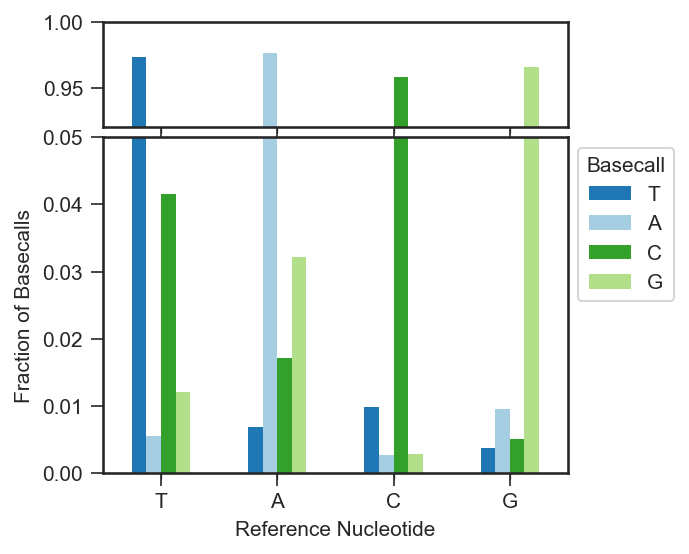

In [31]:
fig = plt.figure(figsize=(4, 5))
fig.subplots_adjust(hspace=0.1)
gs = gridspec.GridSpec(5, 1)

ax_top = plt.subplot(gs[0:1, 0 ])
ax_bottom = plt.subplot(gs[1:4, 0], sharex=ax_top)

# Plot
basecalls.plot(kind="bar", color=cols, ax=ax_top, legend=False)
basecalls.plot(kind="bar", color=cols, ax=ax_bottom)
# Limits
ax_top.set_ylim((0.92, 1.0))
ax_bottom.set_ylim((0, 0.05))
# # Grid
# ax_top.yaxis.set_major_locator(plt.MultipleLocator(0.02))
# ax_top.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
# ax_bottom.yaxis.set_major_locator(plt.MultipleLocator(0.02))
# ax_bottom.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
# ax_top.grid(axis="y", linestyle="dashed")
# ax_bottom.grid(axis="y", linestyle="dashed")
# ax_top.grid(axis="y", which="minor", linestyle="dotted")
# ax_bottom.grid(axis="y", which="minor", linestyle="dotted")
# Labels
# ax_top.set_title("SNV Tendencies")
ax_bottom.set_xticklabels(ax_bottom.get_xticklabels(), rotation=0)
ax_bottom.set_ylabel("Fraction of Basecalls")
ax_bottom.set_xlabel("Reference Nucleotide")
# Legend
ax_bottom.legend(bbox_to_anchor=(1, 1), ncol=1, frameon=True, title="Basecall")

if save_figs:
    fig.savefig(os.path.join(fig_dir, "nt_error_bias.png"),
                bbox_inches="tight",
                pad_inches=0.5)

- Purines tend to be substituted with purines (A to G, G to A)
- Pyrimidines tend to be substituted with pyrimidines (T to C, C to T)
- The AT basepair (which is also more frequent) tends to have a higher SNP error rate than the CG basepair